In [36]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import DrawingOptions
from parameter_extractor import ParameterExtractor, Property

IPythonConsole.molSize = (300, 300)  # Change image size
DrawingOptions.bondLineWidth = 1.8

In [2]:
filename = "l_15"
path = f"./out/spe/{filename}_SPE.out"
path_no_rh = f"./out/spe_no_rh/{filename}_SPE_NoRh.out"
if not os.path.exists(path_no_rh):
    print(path_no_rh + " does not exist")

In [3]:
comp = ParameterExtractor(path=path, no_rh_path=path_no_rh)

In [8]:
bite_angle = comp.get_angle(comp.p1, comp.rh, comp.p2)
p1_rh_dist = comp.get_bond_distance(comp.p1, comp.rh)
p2_rh_dist = comp.get_bond_distance(comp.p2, comp.rh)
p1_bridge_dist = comp.get_bond_distance(comp.p1, comp.bridge)
p2_bridge_dist = comp.get_bond_distance(comp.p2, comp.bridge)
bridge_angle = comp.get_angle(comp.p1, comp.bridge, comp.p2)

print("P1-Rh: " + str(p1_rh_dist), "P2-Rh: " + str(p2_rh_dist), "P1-Bridge: " + str(p1_bridge_dist),
      "P2-Bridge: " + str(p2_bridge_dist), "Bite angle: " + str(bite_angle), "Bridge angle: " + str(bridge_angle))

P1-Rh: 2.3719312711164293 P2-Rh: 2.37194201200198 P1-Bridge: 1.8750391887104654 P2-Bridge: 1.8749946723657644 Bite angle: 72.70956883041772 Bridge angle: 97.16063672571833


In [9]:
comp.dipole

1.9588

In [10]:
r1_p1_r2_angle = comp.get_angle(comp.r1, comp.p1, comp.r2)
r1_p1_rh_angle = comp.get_angle(comp.r1, comp.p1, comp.rh)
rh_p1_bridge_angle = comp.get_angle(comp.rh, comp.p1, comp.bridge)
r1_p1_bridge_angle = comp.get_angle(comp.r1, comp.p1, comp.bridge)
r2_p1_bridge_angle = comp.get_angle(comp.r2, comp.p1, comp.bridge)
r2_p1_rh_angle = comp.get_angle(comp.r2, comp.p1, comp.rh)

p1_angle_sum = r1_p1_bridge_angle + r1_p1_r2_angle + r2_p1_bridge_angle
p1_angle_sum

317.8066693255203

In [11]:
r3_p2_r4_angle = comp.get_angle(comp.r3, comp.p2, comp.r4)
r3_p2_rh_angle = comp.get_angle(comp.r3, comp.p2, comp.rh)
rh_p2_bridge_angle = comp.get_angle(comp.rh, comp.p2, comp.bridge)
r3_p2_bridge_angle = comp.get_angle(comp.r3, comp.p2, comp.bridge)
r4_p2_bridge_angle = comp.get_angle(comp.r4, comp.p2, comp.bridge)
r4_p2_rh_angle = comp.get_angle(comp.r4, comp.p2, comp.rh)

p2_angle_sum = r3_p2_bridge_angle + r3_p2_r4_angle + r4_p2_bridge_angle
p2_angle_sum

317.80297812394565

In [4]:
comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_OCCUPANCY)

'0.05997'

In [13]:
comp.p1.GetPropsAsDict()

{'nbo_charge': 1.1076,
 'nmr_isotropic': 319.369,
 'nmr_anisotropic': 118.7911,
 'molAtomMapNumber': 38,
 'nbo_charge_no_rh': 0.79838,
 'nmr_isotropic_no_rh': 241.6574,
 'nmr_anisotropic_no_rh': 93.1935,
 'lone_pair_occupancy_no_rh_1': 1.93141,
 'lone_pair_energy_no_rh_1': -0.33356}

In [3]:
df = pd.DataFrame()
param_list = []
for file in os.listdir("./out/spe/"):
    filename = file.split(".")[0]
    ligand_name = filename.replace("_SPE", "")
    path = f"./out/spe/{filename}.out"
    path_no_rh = f"./out/spe_no_rh/{filename}_NoRh.out"
    if not os.path.exists(path_no_rh):
        print(path_no_rh + " does not exist")
        continue
        
    print(ligand_name + ": Parameter extraction started.")
    comp = ParameterExtractor(path=path, no_rh_path=path_no_rh)
    
    r1_p1_r2_angle = comp.get_angle(comp.r1, comp.p1, comp.r2)
    r1_p1_rh_angle = comp.get_angle(comp.r1, comp.p1, comp.rh)
    rh_p1_bridge_angle = comp.get_angle(comp.rh, comp.p1, comp.bridge)
    r1_p1_bridge_angle = comp.get_angle(comp.r1, comp.p1, comp.bridge)
    r2_p1_bridge_angle = comp.get_angle(comp.r2, comp.p1, comp.bridge)
    r2_p1_rh_angle = comp.get_angle(comp.r2, comp.p1, comp.rh)
    
    p1_angle_sum = r1_p1_bridge_angle + r1_p1_r2_angle + r2_p1_bridge_angle
    
    r3_p2_r4_angle = comp.get_angle(comp.r3, comp.p2, comp.r4)
    r3_p2_rh_angle = comp.get_angle(comp.r3, comp.p2, comp.rh)
    rh_p2_bridge_angle = comp.get_angle(comp.rh, comp.p2, comp.bridge)
    r3_p2_bridge_angle = comp.get_angle(comp.r3, comp.p2, comp.bridge)
    r4_p2_bridge_angle = comp.get_angle(comp.r4, comp.p2, comp.bridge)
    r4_p2_rh_angle = comp.get_angle(comp.r4, comp.p2, comp.rh)
    
    p2_angle_sum = r3_p2_bridge_angle + r3_p2_r4_angle + r4_p2_bridge_angle
    param_dict = {
        # Global parameters
        "ligand": ligand_name,
        "homo": comp.homo,
        "lumo": comp.lumo,
        "dipole": comp.dipole,
        "rh_charge": comp.rh.get_prop(Property.CHARGE),
        "rh_LP_1_occ": comp.rh.get_prop(Property.LONE_PAIR_OCCUPANCY_1),
        "rh_LP_1_eng": comp.rh.get_prop(Property.LONE_PAIR_ENERGY_1),
        "rh_LP_2_occ": comp.rh.get_prop(Property.LONE_PAIR_OCCUPANCY_2),
        "rh_LP_2_eng": comp.rh.get_prop(Property.LONE_PAIR_ENERGY_2),
        "rh_LP_3_occ": comp.rh.get_prop(Property.LONE_PAIR_OCCUPANCY_3),
        "rh_LP_3_eng": comp.rh.get_prop(Property.LONE_PAIR_ENERGY_3),
        "rh_LP_4_occ": comp.rh.get_prop(Property.LONE_PAIR_OCCUPANCY_4),
        "rh_LP_4_eng": comp.rh.get_prop(Property.LONE_PAIR_ENERGY_4),
        "bite_angle": comp.get_angle(comp.p1, comp.bridge, comp.p2),
        "homo_no_rh": comp.homo_no_rh,
        "lumo_no_rh": comp.lumo_no_rh,
        "dipole_no_rh": comp.dipole_no_rh,
        # missing polarizability, I don't know where to get it from, but does not seem important
        
        # C1 parameters
        "r1_nbo": comp.r1.get_prop(Property.CHARGE),
        "r2_nbo": comp.r2.get_prop(Property.CHARGE),
        "r3_nbo": comp.r3.get_prop(Property.CHARGE),
        "r4_nbo": comp.r4.get_prop(Property.CHARGE),
        "bridge_nbo": comp.bridge.get_prop(Property.CHARGE),
        "p1_nbo": comp.p1.get_prop(Property.CHARGE),
        "p2_nbo": comp.p2.get_prop(Property.CHARGE),
        "c1_nbo": comp.c1.get_prop(Property.CHARGE),
        "c2_nbo": comp.c2.get_prop(Property.CHARGE),
        "c3_nbo": comp.c3.get_prop(Property.CHARGE),
        "c4_nbo": comp.c4.get_prop(Property.CHARGE),
        
        "p1_nmr": comp.p1.get_prop(Property.NMR_ISOTROPIC),
        "p1_nmr_aniso": comp.p1.get_prop(Property.NMR_ANISOTROPIC),
        "p2_nmr": comp.p2.get_prop(Property.NMR_ISOTROPIC),
        "p2_nmr_aniso": comp.p2.get_prop(Property.NMR_ANISOTROPIC),
        
        "p1_rh_bond_occ": comp.get_bond(comp.p1, comp.rh).get_prop(Property.BOND_OCCUPANCY),
        "p2_rh_bond_occ": comp.get_bond(comp.p2, comp.rh).get_prop(Property.BOND_OCCUPANCY),
        "p1_rh_bond_eng": comp.get_bond(comp.p1, comp.rh).get_prop(Property.BOND_ENERGY),
        "p2_rh_bond_eng": comp.get_bond(comp.p2, comp.rh).get_prop(Property.BOND_ENERGY),
        "p1_rh_antibond_occ": comp.get_bond(comp.p1, comp.rh).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p2_rh_antibond_occ": comp.get_bond(comp.p2, comp.rh).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p1_rh_antibond_eng": comp.get_bond(comp.p1, comp.rh).get_prop(Property.ANTIBOND_ENERGY),
        "p2_rh_antibond_eng": comp.get_bond(comp.p2, comp.rh).get_prop(Property.ANTIBOND_ENERGY),
        "p1_r1_bond_occ": comp.get_bond(comp.p1, comp.r1).get_prop(Property.BOND_OCCUPANCY),
        "p1_r2_bond_occ": comp.get_bond(comp.p1, comp.r2).get_prop(Property.BOND_OCCUPANCY),
        "p2_r3_bond_occ": comp.get_bond(comp.p2, comp.r3).get_prop(Property.BOND_OCCUPANCY),
        "p2_r4_bond_occ": comp.get_bond(comp.p2, comp.r4).get_prop(Property.BOND_OCCUPANCY),
        "p1_r1_bond_eng": comp.get_bond(comp.p1, comp.r1).get_prop(Property.BOND_ENERGY),
        "p1_r2_bond_eng": comp.get_bond(comp.p1, comp.r2).get_prop(Property.BOND_ENERGY),
        "p2_r3_bond_eng": comp.get_bond(comp.p2, comp.r3).get_prop(Property.BOND_ENERGY),
        "p2_r4_bond_eng": comp.get_bond(comp.p2, comp.r4).get_prop(Property.BOND_ENERGY),
        "p1_r1_antibond_occ": comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p1_r2_antibond_occ": comp.get_bond(comp.p1, comp.r2).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p2_r3_antibond_occ": comp.get_bond(comp.p2, comp.r3).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p2_r4_antibond_occ": comp.get_bond(comp.p2, comp.r4).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p1_r1_antibond_eng": comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_ENERGY),
        "p1_r2_antibond_eng": comp.get_bond(comp.p1, comp.r2).get_prop(Property.ANTIBOND_ENERGY),
        "p2_r3_antibond_eng": comp.get_bond(comp.p2, comp.r3).get_prop(Property.ANTIBOND_ENERGY),
        "p2_r4_antibond_eng": comp.get_bond(comp.p2, comp.r4).get_prop(Property.ANTIBOND_ENERGY),
        "p1_bridge_bond_occ": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.BOND_OCCUPANCY),
        "p2_bridge_bond_occ": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.BOND_OCCUPANCY),
        "p1_bridge_bond_eng": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.BOND_ENERGY),
        "p2_bridge_bond_eng": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.BOND_ENERGY),
        "p1_bridge_antibond_occ": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p2_bridge_antibond_occ": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.ANTIBOND_OCCUPANCY),
        "p1_bridge_antibond_eng": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.ANTIBOND_ENERGY),
        "p2_bridge_antibond_eng": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.ANTIBOND_ENERGY),
        
        "c1_rh_dist": comp.get_bond_distance(comp.c1, comp.rh),
        "c2_rh_dist": comp.get_bond_distance(comp.c2, comp.rh),
        "c3_rh_dist": comp.get_bond_distance(comp.c3, comp.rh),
        "c4_rh_dist": comp.get_bond_distance(comp.c4, comp.rh),
        "p1_c1_dist": comp.get_bond_distance(comp.p1, comp.c1),
        "p1_c2_dist": comp.get_bond_distance(comp.p1, comp.c2),
        "p2_c3_dist": comp.get_bond_distance(comp.p2, comp.c3),
        "p2_c4_dist": comp.get_bond_distance(comp.p2, comp.c4),
        "p1_bridge_dist": comp.get_bond_distance(comp.p1, comp.bridge),
        "p2_bridge_dist": comp.get_bond_distance(comp.p2, comp.bridge),
        
        "p1_angle_sum": p1_angle_sum,
        "p2_angle_sum": p2_angle_sum,
        "rh_p1_bridge_angle": rh_p1_bridge_angle,
        "rh_p2_bridge_angle": rh_p2_bridge_angle,
        "r1_p1_rh_angle": r1_p1_rh_angle,
        "r2_p1_rh_angle": r2_p1_rh_angle,
        "r3_p2_rh_angle": r3_p2_rh_angle,
        "r4_p2_rh_angle": r4_p2_rh_angle,
        "r1_p1_bridge_angle": r1_p1_bridge_angle,
        "r2_p1_bridge_angle": r2_p1_bridge_angle,
        "r3_p2_bridge_angle": r3_p2_bridge_angle,
        "r4_p2_bridge_angle": r4_p2_bridge_angle,
        
        "p1_nbo_no_rh": comp.p1.get_prop(Property.CHARGE_NO_RH),
        "p2_nbo_no_rh": comp.p2.get_prop(Property.CHARGE_NO_RH),
        "r1_nbo_no_rh": comp.r1.get_prop(Property.CHARGE_NO_RH),
        "r2_nbo_no_rh": comp.r2.get_prop(Property.CHARGE_NO_RH),
        "r3_nbo_no_rh": comp.r3.get_prop(Property.CHARGE_NO_RH),
        "r4_nbo_no_rh": comp.r4.get_prop(Property.CHARGE_NO_RH),
        "bridge_nbo_no_rh": comp.bridge.get_prop(Property.CHARGE_NO_RH),
        
        "p1_nmr_no_rh": comp.p1.get_prop(Property.NMR_ISOTROPIC_NO_RH),
        "p1_nmr_aniso_no_rh": comp.p1.get_prop(Property.NMR_ANISOTROPIC_NO_RH),
        "p2_nmr_no_rh": comp.p2.get_prop(Property.NMR_ISOTROPIC_NO_RH),
        "p2_nmr_aniso_no_rh": comp.p2.get_prop(Property.NMR_ANISOTROPIC_NO_RH),
        
        "p1_LP_occ_no_rh": comp.p1.get_prop(Property.LONE_PAIR_OCCUPANCY_NO_RH_1),
        "p1_LP_eng_no_rh": comp.p1.get_prop(Property.LONE_PAIR_ENERGY_NO_RH_1),
        "p2_LP_occ_no_rh": comp.p2.get_prop(Property.LONE_PAIR_OCCUPANCY_NO_RH_1),
        "p2_LP_eng_no_rh": comp.p2.get_prop(Property.LONE_PAIR_ENERGY_NO_RH_1),
        
        "p1_r1_bond_occ_no_rh": comp.get_bond(comp.p1, comp.r1).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p1_r2_bond_occ_no_rh": comp.get_bond(comp.p1, comp.r2).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p2_r3_bond_occ_no_rh": comp.get_bond(comp.p2, comp.r3).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p2_r4_bond_occ_no_rh": comp.get_bond(comp.p2, comp.r4).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p1_r1_bond_eng_no_rh": comp.get_bond(comp.p1, comp.r1).get_prop(Property.BOND_ENERGY_NO_RH),
        "p1_r2_bond_eng_no_rh": comp.get_bond(comp.p1, comp.r2).get_prop(Property.BOND_ENERGY_NO_RH),
        "p2_r3_bond_eng_no_rh": comp.get_bond(comp.p2, comp.r3).get_prop(Property.BOND_ENERGY_NO_RH),
        "p2_r4_bond_eng_no_rh": comp.get_bond(comp.p2, comp.r4).get_prop(Property.BOND_ENERGY_NO_RH),
        "p1_r1_antibond_occ_no_rh": comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p1_r2_antibond_occ_no_rh": comp.get_bond(comp.p1, comp.r2).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p2_r3_antibond_occ_no_rh": comp.get_bond(comp.p2, comp.r3).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p2_r4_antibond_occ_no_rh": comp.get_bond(comp.p2, comp.r4).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p1_r1_antibond_eng_no_rh": comp.get_bond(comp.p1, comp.r1).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p1_r2_antibond_eng_no_rh": comp.get_bond(comp.p1, comp.r2).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p2_r3_antibond_eng_no_rh": comp.get_bond(comp.p2, comp.r3).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p2_r4_antibond_eng_no_rh": comp.get_bond(comp.p2, comp.r4).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p1_bridge_bond_occ_no_rh": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p2_bridge_bond_occ_no_rh": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.BOND_OCCUPANCY_NO_RH),
        "p1_bridge_bond_eng_no_rh": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.BOND_ENERGY_NO_RH),
        "p2_bridge_bond_eng_no_rh": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.BOND_ENERGY_NO_RH),
        "p1_bridge_antibond_occ_no_rh": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p2_bridge_antibond_occ_no_rh": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.ANTIBOND_OCCUPANCY_NO_RH),
        "p1_bridge_antibond_eng_no_rh": comp.get_bond(comp.p1, comp.bridge).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        "p2_bridge_antibond_eng_no_rh": comp.get_bond(comp.p2, comp.bridge).get_prop(Property.ANTIBOND_ENERGY_NO_RH),
        
        "p1_LP_s_occ_no_rh": comp.p1.get_prop(Property.LONE_PAIR_S_ORBITAL_NO_RH),
        "p2_LP_s_occ_no_rh": comp.p2.get_prop(Property.LONE_PAIR_S_ORBITAL_NO_RH),
    }
    
    
    for radius in range(1, 7, 1):
        bv = comp.buried_volume(radius)
        bv.octant_analysis()
        param_dict[f"Vbur%_{float(radius)}"] = bv.fraction_buried_volume * 100
        param_dict[f"NE_{float(radius)}"] = bv.quadrants["percent_buried_volume"][1]
        param_dict[f"NW_{float(radius)}"] = bv.quadrants["percent_buried_volume"][2]
        param_dict[f"SE_{float(radius)}"] = bv.quadrants["percent_buried_volume"][3]
        param_dict[f"SW_{float(radius)}"] = bv.quadrants["percent_buried_volume"][4]
        
    param_list.append(param_dict)
df = pd.DataFrame(param_list)

dcPAMP: Parameter extraction started.
dcpa: Parameter extraction started.
diprpa: Parameter extraction started.
DS-10: Parameter extraction started.
DS-11: Parameter extraction started.
DS-12: Parameter extraction started.
DS-13: Parameter extraction started.
DS-14: Parameter extraction started.
DS-15: Parameter extraction started.
DS-16: Parameter extraction started.
DS-17: Parameter extraction started.
DS-18: Parameter extraction started.
DS-19: Parameter extraction started.
DS-1: Parameter extraction started.
DS-20: Parameter extraction started.
DS-21: Parameter extraction started.
DS-22: Parameter extraction started.
DS-23: Parameter extraction started.
DS-24: Parameter extraction started.
DS-25: Parameter extraction started.
DS-26: Parameter extraction started.
DS-27: Parameter extraction started.
DS-28: Parameter extraction started.
DS-29: Parameter extraction started.
DS-2: Parameter extraction started.
DS-30: Parameter extraction started.
DS-31: Parameter extraction started.
DS

In [4]:
df

,ligand,homo,lumo,dipole,rh_charge,rh_LP_1_occ,rh_LP_1_eng,rh_LP_2_occ,rh_LP_2_eng,rh_LP_3_occ,...,Vbur%_5.0,NE_5.0,NW_5.0,SE_5.0,SW_5.0,Vbur%_6.0,NE_6.0,NW_6.0,SE_6.0,SW_6.0
0,dcPAMP,-0.30529,-0.16003,0.4737,-0.35437,1.98307,-0.30775,1.95815,-0.35837,1.79868,...,47.315009,47.872189,47.901359,43.261802,50.224685,40.866479,40.639485,40.905710,39.863032,42.057690
1,dcpa,-0.30559,-0.15670,0.4496,-0.37791,1.98391,-0.30623,1.94745,-0.35936,1.80914,...,46.662633,45.645833,47.370786,46.110971,47.522942,41.961087,40.722935,42.928024,41.100277,43.093111
2,diprpa,-0.31343,-0.16420,1.7617,-0.38593,1.98416,-0.31577,1.94642,-0.36749,1.81254,...,45.769804,44.875595,46.616316,44.825140,46.762165,37.797066,37.065173,38.606286,36.490544,39.026260
3,DS-10,-0.30313,-0.17047,1.5365,-0.39825,1.98238,-0.30666,1.95305,-0.35787,1.80014,...,41.628299,40.666488,42.586169,40.668853,42.591687,37.426641,37.590367,37.261554,37.592635,37.262007
4,DS-11,-0.30256,-0.17061,0.5123,-0.37690,1.97580,-0.30490,1.95112,-0.35800,1.80342,...,41.329310,39.719656,43.575573,40.697234,41.324777,36.609143,35.770783,38.222142,36.185315,36.258334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,MS-90,-0.30651,-0.16200,0.5110,-0.39736,1.98036,-0.31040,1.94921,-0.36116,1.81075,...,42.985675,41.764687,45.850020,41.741825,42.586169,39.058914,38.800853,40.686199,38.460248,38.288358
283,MS-91,-0.29003,-0.16617,2.8177,-0.56193,1.97629,-0.31107,1.93650,-0.36681,1.81843,...,43.698362,33.433982,49.999212,37.407367,53.952887,42.449317,34.781169,48.166810,37.559527,49.289764
284,MS-92,-0.29683,-0.15800,2.1256,-0.34873,1.98334,-0.30299,1.95312,-0.35436,1.81012,...,48.356446,48.915203,48.222226,44.351329,51.937025,42.384462,43.225090,41.522518,39.802259,44.987981
285,MS-93,-0.30480,-0.15955,1.8883,-0.30580,1.98230,-0.30363,1.95876,-0.35794,1.79485,...,51.315789,48.516288,48.936489,57.096118,50.714263,46.428069,41.051295,41.059005,59.026260,44.575718


In [17]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "parameters_phd.csv"  # Path to your uploaded CSV file
data = pd.read_csv(file_path)

# Separate the `ligand` column
ligand_column = data['ligand']
data_numeric = data.drop(columns=['ligand'])
data_numeric = data_numeric.fillna(data_numeric.mean())

# Standardize the data (important for PCA)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA to reduce to 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

# Save the transformed data to a new CSV file
pca_df = pd.DataFrame(data_pca, columns=['Component 1', 'Component 2', 'Component 3'])
pca_df['ligand'] = ligand_column.values
# output_file = "/mnt/data/pca_output.csv"
# pca_df.to_csv(output_file, index=False)
#
# print(f"PCA completed. Transformed data saved to {output_file}")
pca_df

,Component 1,Component 2,Component 3,ligand
0,5.931822,0.457674,3.937896,dcPAMP
1,2.924543,-1.761837,3.880005,dcpa
2,1.643196,-4.137959,4.604090,diprpa
3,2.566244,2.044061,-3.211252,DS-10
4,3.960765,1.351283,-3.400545,DS-11
...,...,...,...,...
282,2.384024,2.624356,-2.783570,MS-90
283,-17.285434,7.160849,-0.864206,MS-91
284,3.801457,3.633572,6.416227,MS-92
285,7.523375,1.479296,7.452613,MS-93


np.int64(13)

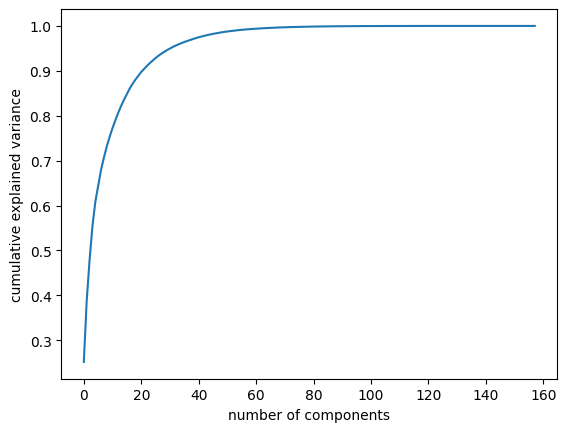

In [56]:
import numpy as np

pca_test = PCA().fit(data_scaled)
cumsum_variance = np.cumsum(pca_test.explained_variance_ratio_)
plt.plot(cumsum_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
num_components = np.argmax(cumsum_variance >= 0.80) + 1
num_components

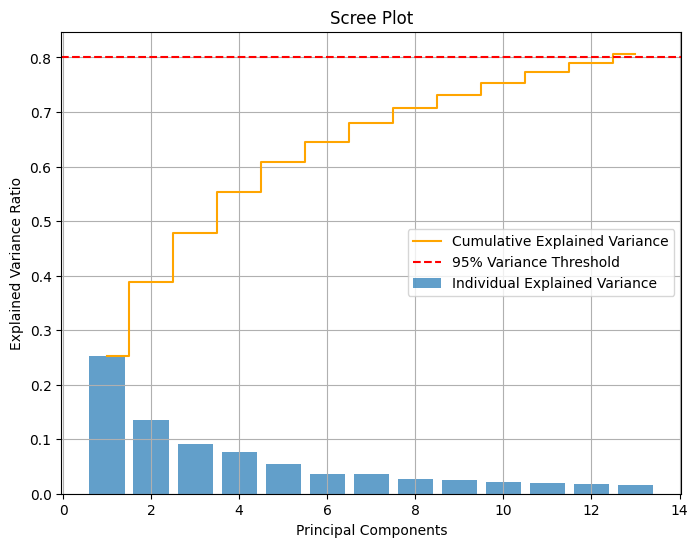

In [59]:
import matplotlib.pyplot as plt

# Fit PCA to the data
pca_test = PCA(n_components=13).fit(data_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca_test.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Explained Variance', color='orange')
plt.axhline(y=0.8, color='r', linestyle='--', label='95% Variance Threshold')

# Customize the plot
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.grid()
plt.show()


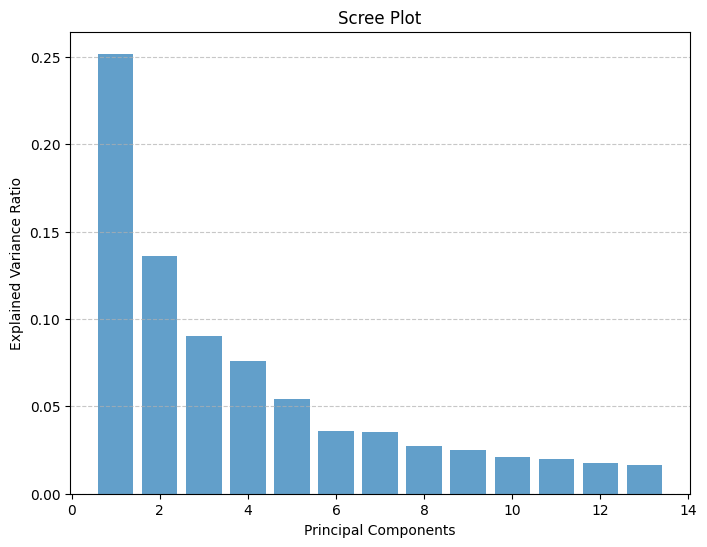

In [58]:
import matplotlib.pyplot as plt

# Fit PCA to the data
pca_test = PCA(n_components=13).fit(data_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca_test.explained_variance_ratio_

# Create a bar plot for the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')

# Customize the plot
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [55]:
feature_names = [col for col in data.columns if col != 'ligand']

loadings = pd.DataFrame(
    pca_test.components_,
    columns=feature_names,  # Feature names
    index=[f'PC{i+1}' for i in range(len(pca_test.components_))]
)
loadings

,#,Unnamed: 1,homo,lumo,dipole,rh_charge,rh_LP_1_occ,rh_LP_1_eng,rh_LP_2_occ,rh_LP_2_eng,...,Vbur%_5.0,NE_5.0,NW_5.0,SE_5.0,SW_5.0,Vbur%_6.0,NE_6.0,NW_6.0,SE_6.0,SW_6.0
PC1,-0.008317,-0.008317,0.058411,0.062825,-0.026106,0.146816,0.034473,0.072758,0.129433,0.086516,...,0.059222,0.050779,0.030645,0.072356,0.032186,0.042521,0.039013,0.023594,0.049769,0.026060
PC2,-0.022957,-0.022957,0.145587,0.114408,-0.037277,0.020676,-0.041300,0.137843,0.009142,0.144973,...,0.133775,0.079229,0.103036,0.104444,0.125691,0.158560,0.115812,0.122885,0.135031,0.142537
PC3,-0.002893,-0.002893,-0.050028,-0.048956,0.054802,0.062027,0.000406,-0.056845,0.024606,-0.051593,...,0.163634,0.158715,0.132315,0.108945,0.109810,0.133790,0.126223,0.110167,0.094757,0.105494
PC4,-0.015294,-0.015294,-0.076106,-0.132251,0.081361,-0.006597,-0.076464,-0.096899,-0.108019,-0.078672,...,-0.009701,0.009867,-0.047628,0.032751,-0.021198,0.010553,0.034452,-0.039740,0.051258,-0.011638
PC5,0.138935,0.138935,-0.031950,0.061125,0.010908,0.003220,0.035014,-0.032193,0.000511,-0.005371,...,0.015987,0.018791,-0.016264,-0.006893,0.051990,-0.008347,-0.000286,-0.037085,-0.029169,0.039769
PC6,0.045661,0.045661,0.059718,0.033702,-0.018938,-0.008728,0.063177,0.051744,0.024422,0.042827,...,-0.027984,0.039638,-0.179251,-0.048635,0.100169,-0.041507,0.035040,-0.165177,-0.080493,0.077546
PC7,-0.062989,-0.062989,-0.079913,-0.083801,-0.001978,0.024181,0.028929,-0.077003,0.020902,-0.055566,...,0.009989,-0.140872,-0.080697,0.168780,0.078197,-0.011207,-0.136741,-0.063573,0.109530,0.049144
PC8,0.062382,0.062382,0.000960,0.059921,-0.093787,-0.048427,-0.062967,0.007899,0.010595,-0.004256,...,0.081035,-0.017206,0.064047,0.033937,0.159511,0.085501,0.032129,0.058403,0.057555,0.129731
PC9,0.087802,0.087802,-0.000252,0.004223,-0.146318,-0.015220,-0.111086,0.000666,-0.035701,0.079878,...,0.003494,0.065793,-0.005792,0.009954,-0.051948,-0.006901,0.017572,0.000634,-0.014805,-0.025148
PC10,-0.066851,-0.066851,-0.044935,-0.013551,0.033089,-0.034002,-0.170906,-0.077351,0.055788,-0.051663,...,0.027222,0.027726,0.024857,-0.003183,0.033838,-0.019891,-0.032048,-0.004354,-0.049357,0.021040


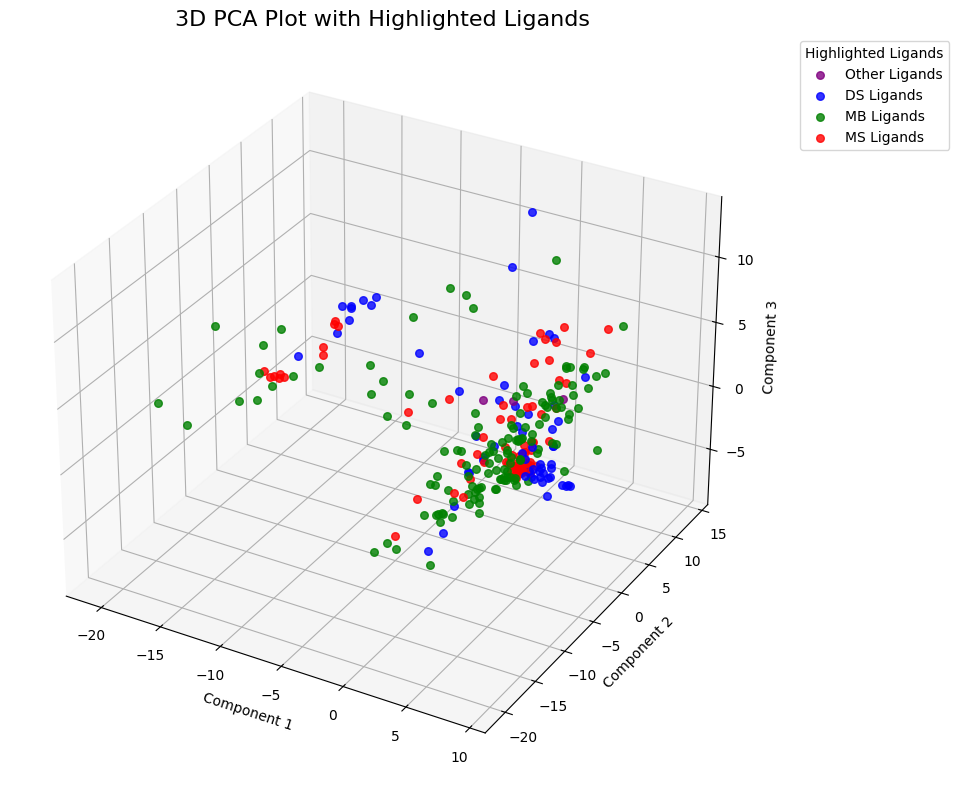

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Specify ligands to highlight
highlight_ligands = ['l_44', 'l_45', "l_46", "l_47", "l_48", "l_49", "l_58", "l_59"]

# 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}
labels_added = {key: False for key in categories}

for ligand in pca_df['ligand'].unique():
    subset = pca_df[pca_df['ligand'] == ligand]
    if "DS" in ligand:
        category = "DS"
    elif "MS" in ligand:
        category = "MS"
    elif "MB" in ligand:
        category = "MB"
    else:
        category = "Other"

    ax.scatter(
        subset['Component 1'],
        subset['Component 2'],
        subset['Component 3'],
        color=categories[category]["color"],
        s=30,
        alpha=0.8,
        label=categories[category]["label"] if not labels_added[category] else None
    )
    labels_added[category] = True

ax.set_title('3D PCA Plot with Highlighted Ligands', fontsize=16)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend(title='Highlighted Ligands', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
pca_df

,Component 1,Component 2,Component 3,ligand
0,5.931822,0.457674,3.937896,dcPAMP
1,2.924543,-1.761837,3.880005,dcpa
2,1.643196,-4.137959,4.604090,diprpa
3,2.566244,2.044061,-3.211252,DS-10
4,3.960765,1.351283,-3.400545,DS-11
...,...,...,...,...
282,2.384024,2.624356,-2.783570,MS-90
283,-17.285434,7.160849,-0.864206,MS-91
284,3.801457,3.633572,6.416227,MS-92
285,7.523375,1.479296,7.452613,MS-93


In [21]:
import plotly.express as px

# Specify ligands to highlight
highlight_ligands = ['l_44', 'l_45', "l_46", "l_47", "l_48", "l_49", "l_58", "l_59"]

# Add a new column for color coding (highlight or default)
# pca_df['color'] = pca_df['ligand'].apply(
#     lambda x: x if x in highlight_ligands else 'Other'
# )

# Create a 3D scatter plot
fig = px.scatter_3d(
    pca_df,
    x='Component 1',
    y='Component 2',
    z='Component 3',
    # color='color',
    title='Interactive 3D PCA Plot',
    hover_data={'ligand': True},
    # labels={'ligand': 'Name'},
    # symbol='color',  # Optional: use different symbols for highlighted ligands
    opacity=0.8
)

# Customize the layout
fig.update_layout(
    legend=dict(title='Ligand Categories'),
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    )
)

# Show the interactive plot
fig.show()

In [28]:
import plotly.graph_objects as go

# Dictionary for ligand categories and their colors
categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}

# Initialize a Plotly figure
fig = go.Figure()

# Add scatter traces for each category
for category, properties in categories.items():
    subset = pca_df[
        pca_df['ligand'].str.contains(category) if category != "Other" else ~pca_df['ligand'].str.contains("DS|MS|MB")
    ]
    fig.add_trace(
        go.Scatter3d(
            x=subset['Component 1'],
            y=subset['Component 2'],
            z=subset['Component 3'],
            mode='markers',
            marker=dict(size=5, color=properties["color"]),
            name=properties["label"],  # Legend label
            text=subset['ligand'],  # Hover text
            hoverinfo="text"  # Display only hover text
        )
    )

# Customize layout
fig.update_layout(
    title='3D PCA Plot with Highlighted Ligands',
    scene=dict(
        xaxis_title='Component 1',
        yaxis_title='Component 2',
        zaxis_title='Component 3'
    ),
    legend=dict(title="Ligand Categories")
)

# Show plot
fig.show()


In [29]:
import plotly.express as px
import pandas as pd

# Dictionary for ligand categories and their colors
categories = {
    "DS": {"color": "blue", "label": "DS Ligands"},
    "MS": {"color": "red", "label": "MS Ligands"},
    "MB": {"color": "green", "label": "MB Ligands"},
    "Other": {"color": "purple", "label": "Other Ligands"},
}

# Assign a category to each ligand for color coding
def get_category(ligand):
    if "DS" in ligand:
        return "DS Ligands"
    elif "MS" in ligand:
        return "MS Ligands"
    elif "MB" in ligand:
        return "MB Ligands"
    else:
        return "Other Ligands"

pca_df['category'] = pca_df['ligand'].apply(get_category)

# Define a function to plot 2D slices
def plot_2d_slice(x, y, x_label, y_label):
    fig = px.scatter(
        pca_df,
        x=x,
        y=y,
        color='category',
        color_discrete_map={
            "DS Ligands": "blue",
            "MS Ligands": "red",
            "MB Ligands": "green",
            "Other Ligands": "purple",
        },
        hover_data={'ligand': True},  # Show ligand names on hover
        title=f'2D PCA Slice: {x_label} vs {y_label}',
        labels={'category': 'Ligand Category'}
    )
    fig.update_layout(
        xaxis_title=x_label,
        yaxis_title=y_label,
        legend_title="Ligand Categories"
    )
    return fig

# Generate and display 2D slices
fig1 = plot_2d_slice('Component 1', 'Component 2', 'Component 1', 'Component 2')
fig2 = plot_2d_slice('Component 1', 'Component 3', 'Component 1', 'Component 3')
fig3 = plot_2d_slice('Component 2', 'Component 3', 'Component 2', 'Component 3')

# Show the figures
fig1.show()
fig2.show()
fig3.show()
